In [1]:
#import all the encessary libraries 
!pip install xgboost
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Reading the files given for performing the tasks 
traindf = pd.read_csv(r"C:\Users\priya\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_train.csv")
testdf = pd.read_csv(r"C:\Users\priya\Downloads\XGBM & LGBM\XGBM & LGBM\Titanic_test.csv")

In [3]:
#spliting the data into y and traindf since the surbvied column for testing is not given and can't be generated for modfdelbuilding 
y=traindf['Survived']
traindf.drop(columns='Survived',inplace=True)

In [4]:
traindf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df = pd.concat([traindf,testdf],ignore_index=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


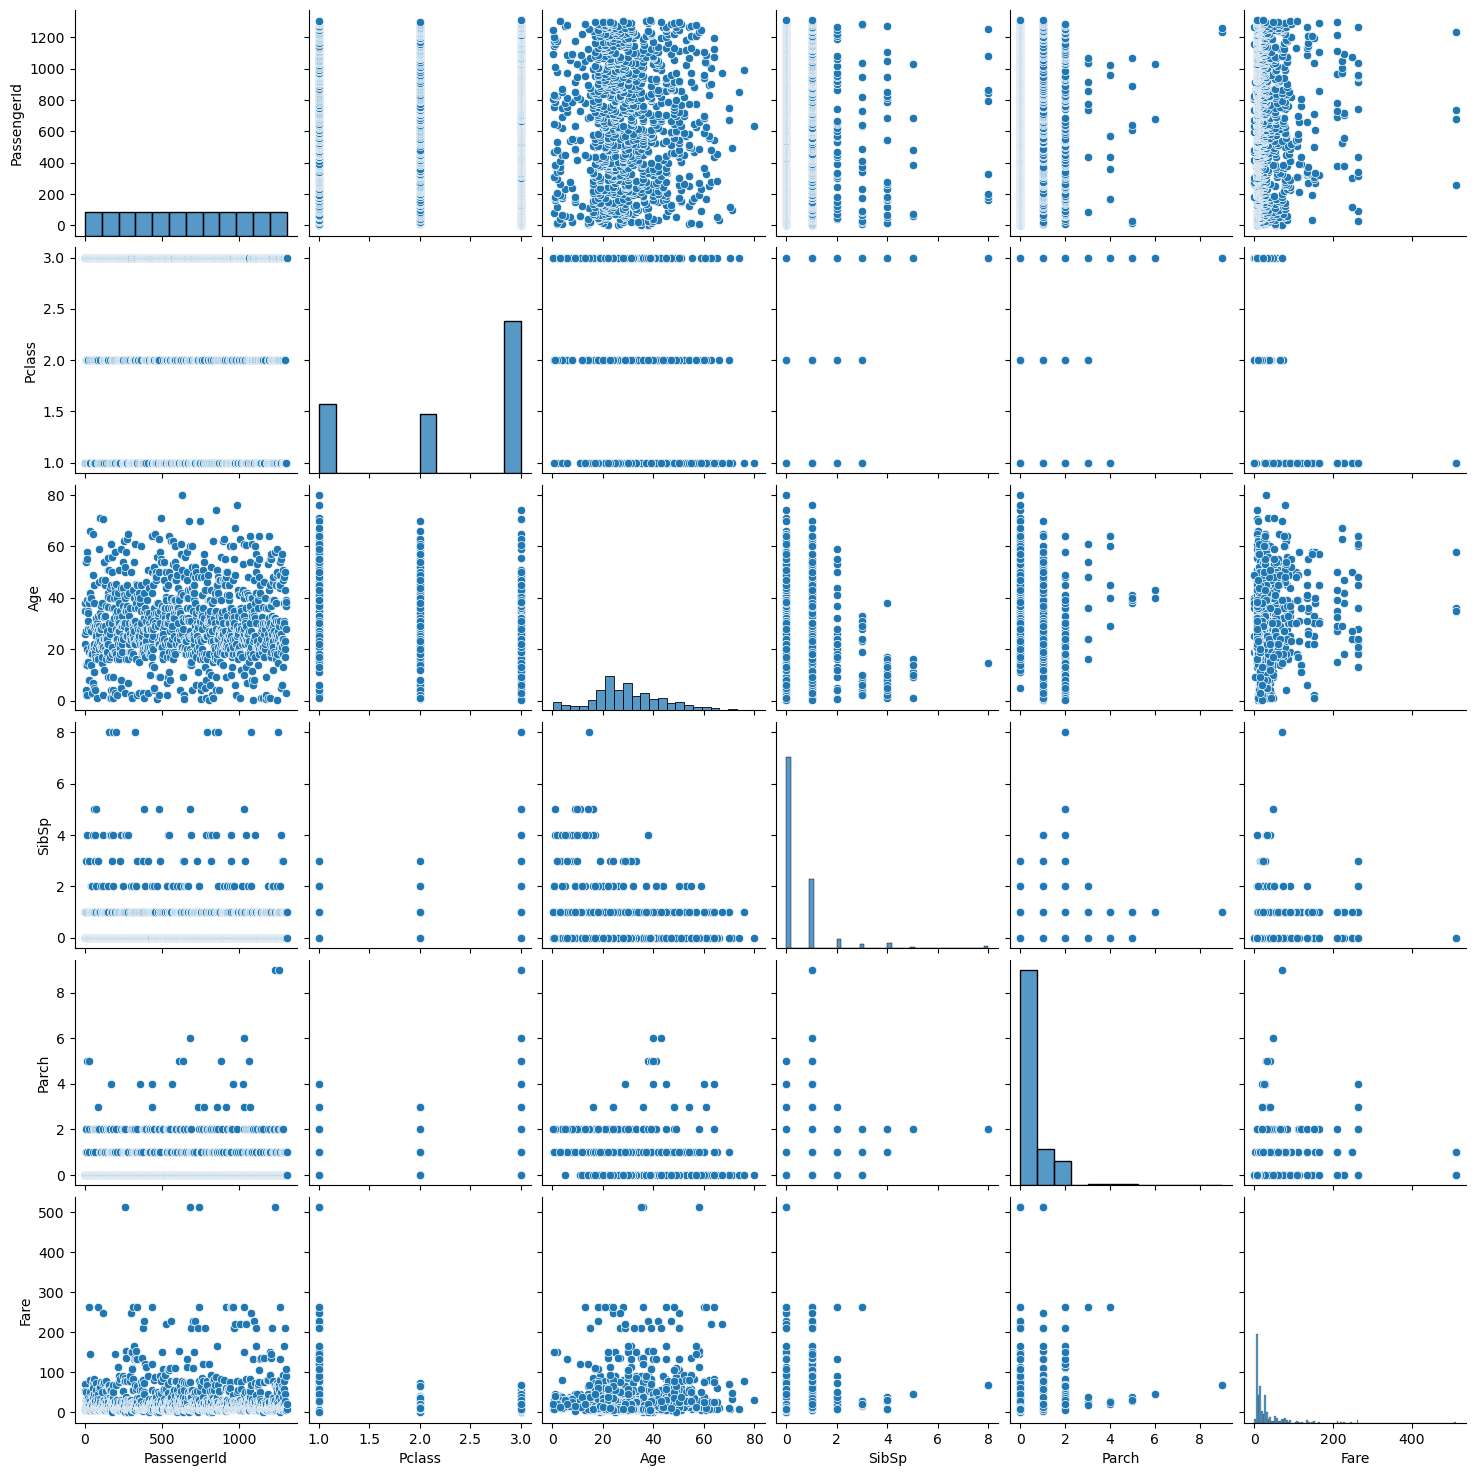

In [7]:
sns.pairplot(df)

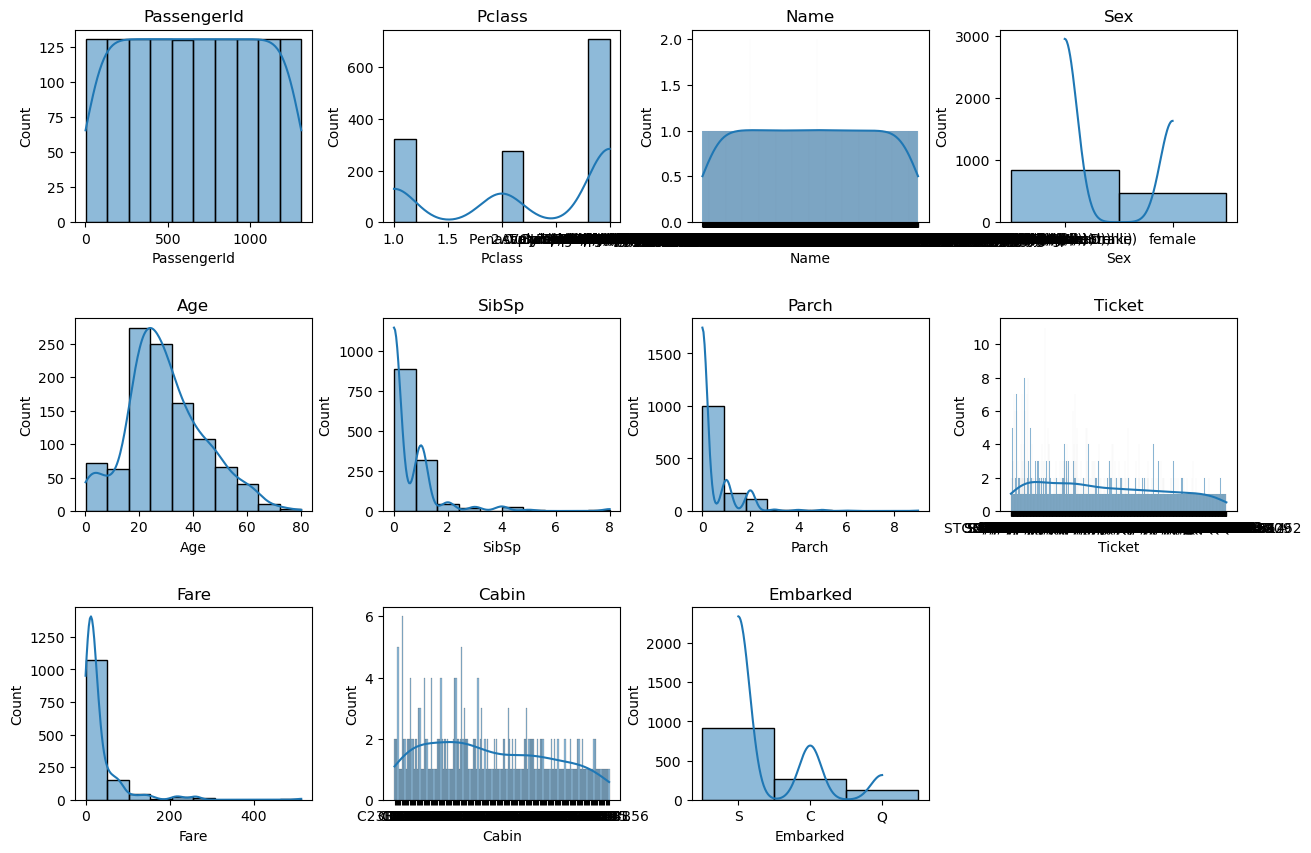

In [8]:
# Set up the plotting area
plt.figure(figsize=(15, 10))

# Create histograms for each column
for i, col in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)  # Adjust for the number of columns
    sns.histplot(df[col], bins=10, kde=True)  # Specify the column to plot
    plt.title(col)  # Add title for each subplot

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust layout to prevent overlap
plt.show()

<Axes: >

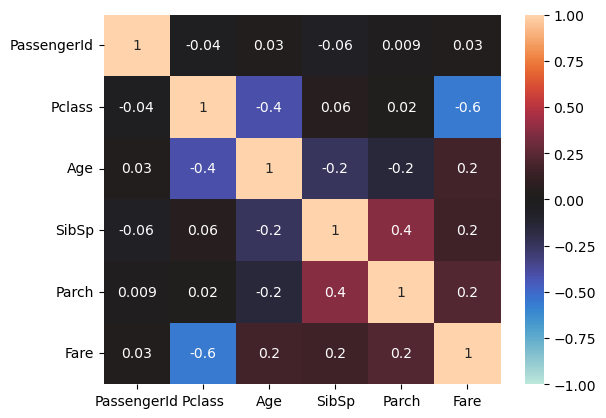

In [9]:
#Checking correlation between each columns with another 
sns.heatmap(df.corr(),vmin=-1,vmax=1,center=0,annot=True,fmt='.1g')

In [10]:
#dropping the irrelavent columns 
df.drop(columns=['Name','Cabin','Ticket'],inplace=True)

In [11]:
#Checking if the datset has missing values or not if yes then we will apply various imputation techniques in next cell
df.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [12]:
for i in df.columns:
    print(f'Percentege of missing values in {i} column : {(df[i].isna().sum()/1309)*100}')

Percentege of missing values in PassengerId column : 0.0
Percentege of missing values in Pclass column : 0.0
Percentege of missing values in Sex column : 0.0
Percentege of missing values in Age column : 20.091673032849503
Percentege of missing values in SibSp column : 0.0
Percentege of missing values in Parch column : 0.0
Percentege of missing values in Fare column : 0.07639419404125286
Percentege of missing values in Embarked column : 0.15278838808250572


In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'].astype(int)

0       22
1       38
2       26
3       35
4       35
        ..
1304    29
1305    39
1306    38
1307    29
1308    29
Name: Age, Length: 1309, dtype: int32

In [14]:
df['Sex']=df['Sex'].replace({'male': 1,'female':0})

In [15]:
#getting dummy variables for categorical columns 
df = pd.get_dummies(df,columns=['Embarked'],dtype=int)

In [16]:
df.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked_C       int32
Embarked_Q       int32
Embarked_S       int32
dtype: object

In [17]:
#again spliting the data into train and test 
traindf = df.iloc[:891,:]
testdf = df.iloc[891:,:]

In [18]:
traindf.dropna(inplace=True)
testdf.dropna(inplace=True)

In [19]:
#function for our model and science we don't have the test y column we will only be predicting the trainig accuracy
def prediction(model):
    model.fit(traindf,y)
    yp = model.predict(testdf)
    print(f"Train Accuracy: {model.score(traindf,y)}")
    # print(f"Test Accuracy: {model.score(xtest,ytest)}")
    # print(classification_report(ytest,yp))

In [20]:
#Train accuracy on XGBOOST
prediction(XGBClassifier())

Train Accuracy: 0.9977553310886644


In [21]:
#Train accuracy on LGBM 
prediction(GradientBoostingClassifier())

Train Accuracy: 0.8978675645342312
